In [6]:
from astropy.io import fits
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import matplotlib as mpl
from scipy.stats import skew # calculates skewness of gaussian
from scipy.stats import skewnorm

# customize plot style
sns.set_context('talk')
plt.style.use('default')

In [3]:
hf_vals = [] # all hf values for each file
def get_hyperfine_values(filepath):
    print("Getting values for", filepath)
    hdul = fits.open(filepath)
    hdr = hdul[0].header
    hdr.set('BLANCK', 'none') 
    hdr.set('NAXIS3',1) 
    d = hdul[0].data 
    data_array = np.swapaxes(d,0,2)
    hdul.close()
    #storing all values of interest in a list
    all_hf_values = []
    for i in data_array:
        for j in i:
            for k in j:
                if k == np.isnan:
                    pass
                else:
                    all_hf_values.append(k)
    nonan = [x for x in all_hf_values if str(x) != 'nan']
    for n in nonan:
        hf_vals.append(n)  
    return 

# functions for getting left/right xvals at fwhm
# fwhm contains around 2.5 stdevs of data
def find_left_fwhm(hist, bins):
    peak_index = np.argmax(hist)
    peak_value = hist[peak_index]
    fwhm_value = peak_value / 2.0
    
    left_bin = peak_index
    while left_bin > 0 and hist[left_bin] >= fwhm_value:
        left_bin -= 1
    
    if hist[left_bin] < fwhm_value:
        right_bin = left_bin + 1
        left_value = bins[left_bin]
        right_value = bins[right_bin]
        right_weight = (hist[right_bin] - fwhm_value) / (hist[right_bin] - hist[left_bin])
        left_fwhm = left_value + (right_value - left_value) * right_weight
        return left_fwhm
    else:
        # Left FWHM not found
        return None

def find_right_fwhm(hist, bins):
    peak_index = np.argmax(hist)
    peak_value = hist[peak_index]
    fwhm_value = peak_value / 2.0
    
    right_bin = peak_index
    while right_bin < len(hist) - 1 and hist[right_bin] >= fwhm_value:
        right_bin += 1
    
    if hist[right_bin] < fwhm_value:
        left_bin = right_bin - 1
        left_value = bins[left_bin]
        right_value = bins[right_bin]
        left_weight = (hist[left_bin] - fwhm_value) / (hist[left_bin] - hist[right_bin])
        right_fwhm = right_value - (right_value - left_value) * left_weight
        return right_fwhm
    else:
        # Right FWHM not found
        return None

In [14]:

L_file = ['L47','L43','L41','L40_5','L40','L39_5','L39','L38_5','L38','L37_5',
            'L37','L36_5','L36','L35_5','L35','L34_5','L34','L33_5','L33','L32_5'
            ,'L32','L31_5','L31','L30_5','L30','L29_5','L29','L28_5','L28','L27_5'
            ,'L27','L26_5','L26','L25_5','L25','L24_5','L24','L23_5','L23','L22_5'
            ,'L22','L21_5','L21','L20_5','L20','L19','L18_5','L18','L17_5','L17',
            'L16_5','L15_5','L15','L14_5','L14','L13_5','L13','L12_5','L12',
            'L11_5','L11','L10_5','L10']


#L_file = ['L47', 'L43', 'L41']
# get all hf values in a list
for L in L_file:
    get_hyperfine_values('D:/hf_vel/'+L+'_NH3_1-1_hf_width.fits')
    

Getting values for D:/hf_vel/L47_NH3_1-1_hf_width.fits


Getting values for D:/hf_vel/L43_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L41_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L40_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L40_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L39_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L39_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L38_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L38_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L37_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L37_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L36_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L36_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L35_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L35_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L34_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L34_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L33_5_NH3_1-1_hf_width.fits
Getting values for D:/hf_vel/L33_NH3_1-1_hf_width

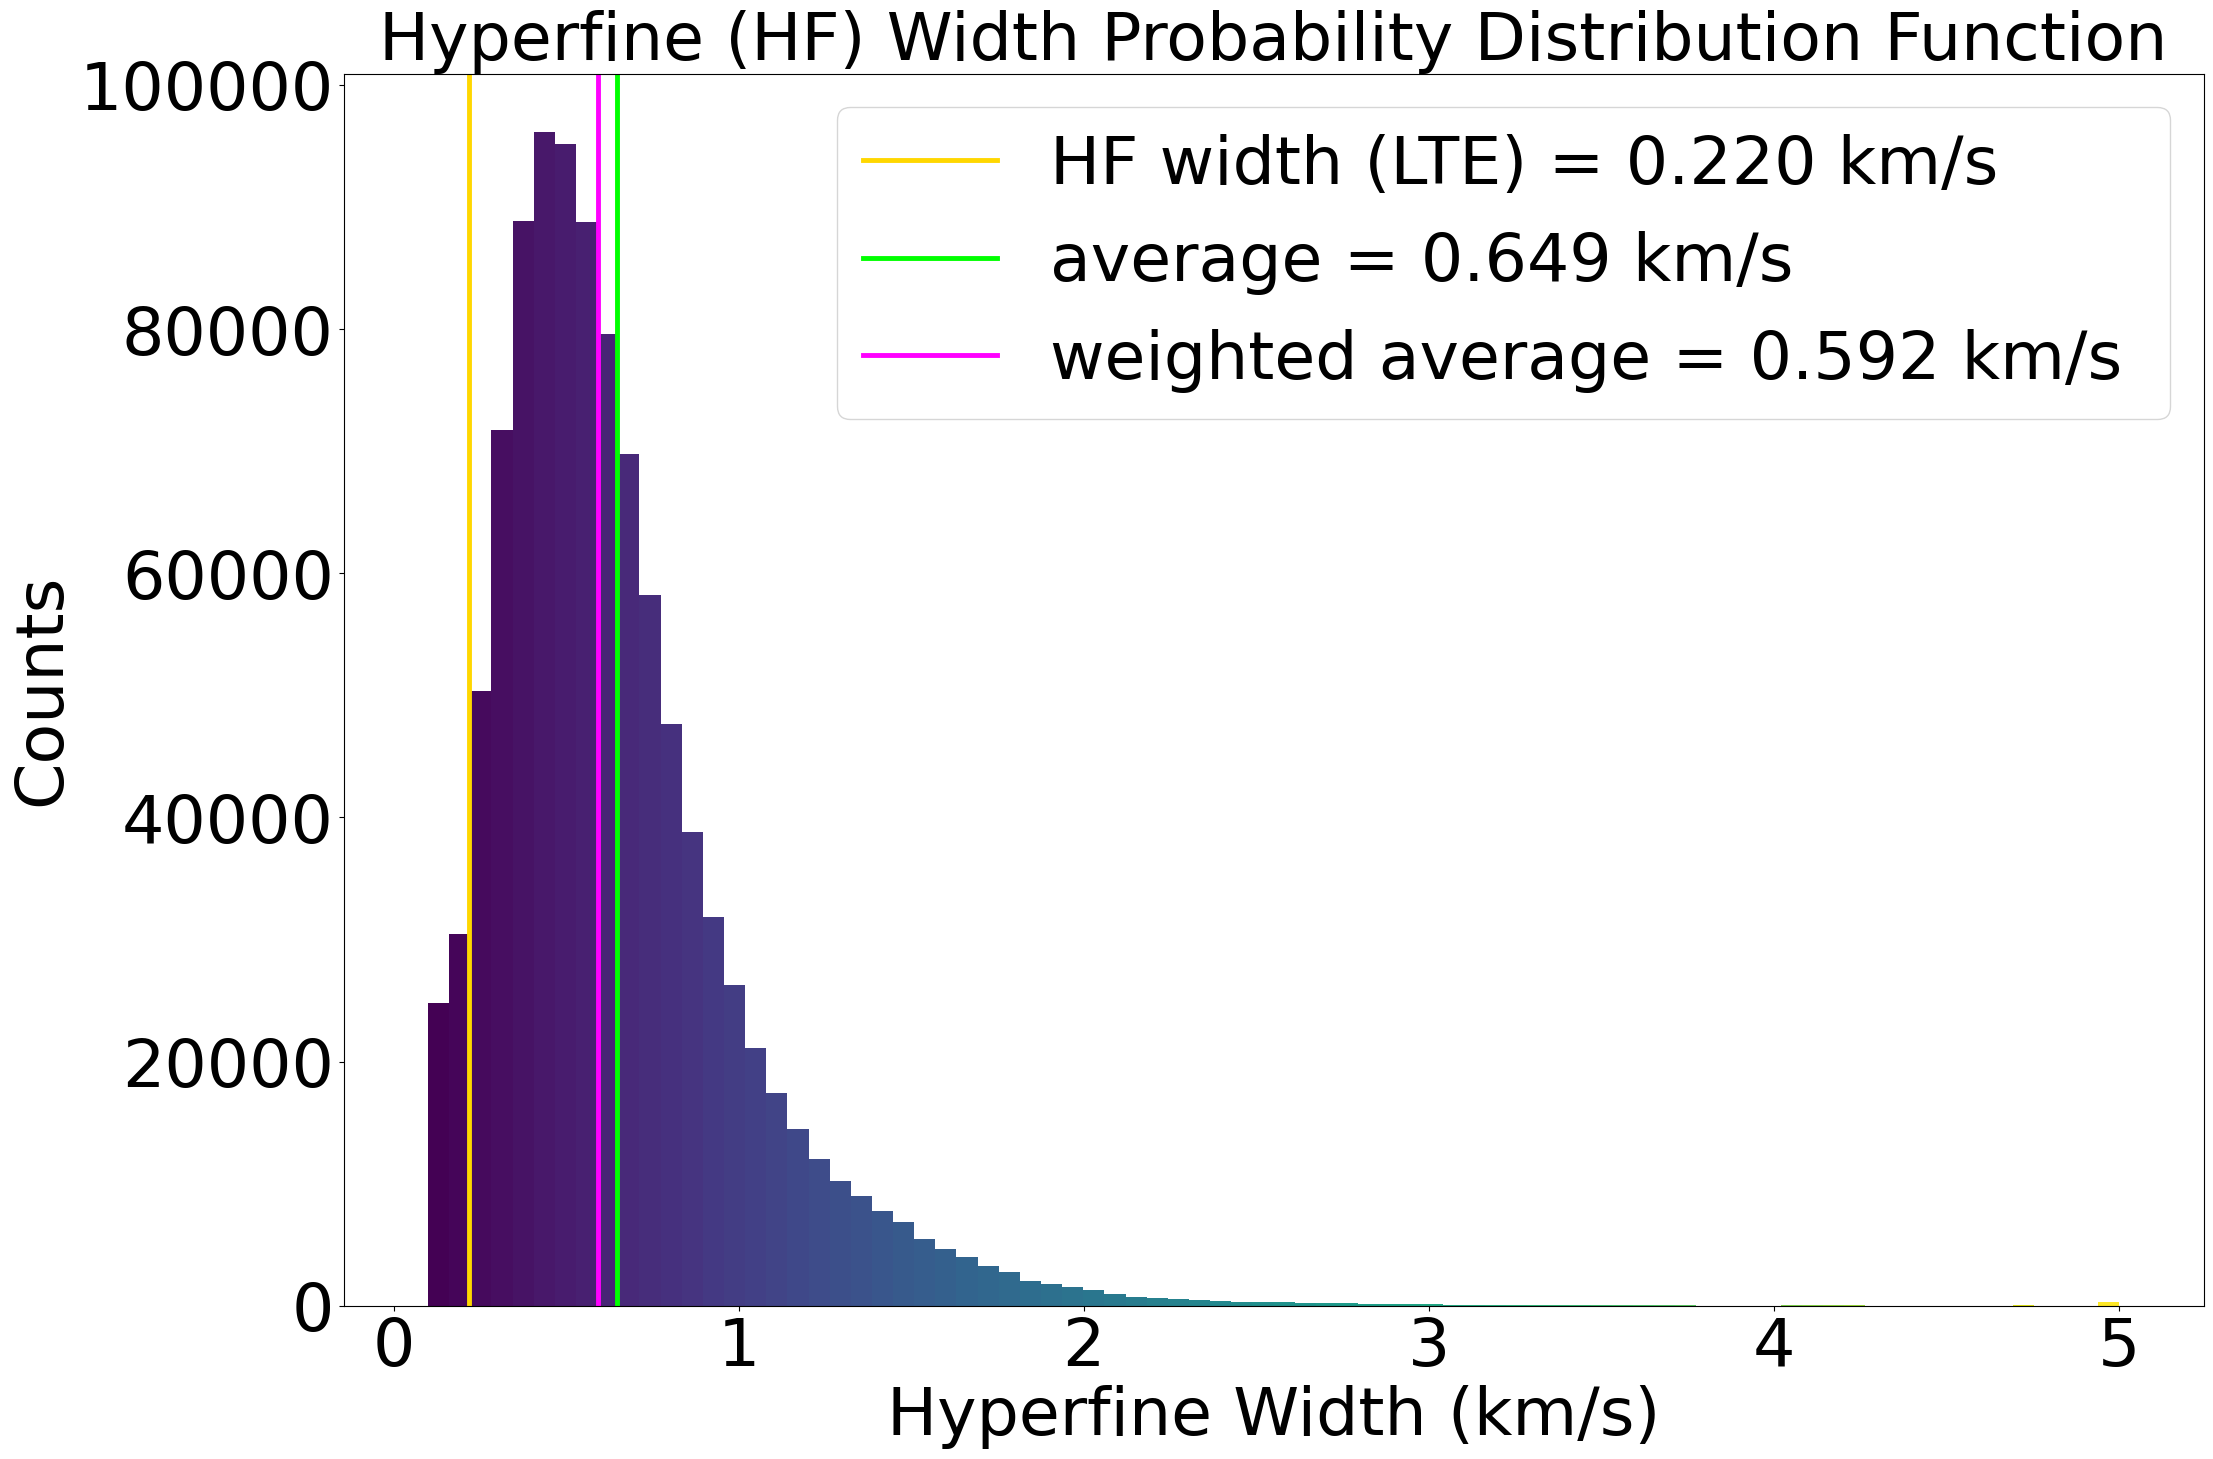

In [19]:
# plotting PDF
N, bins, patches = plt.hist(hf_vals, bins=80)

# calculating statistics
mean_val = statistics.mean(hf_vals)
#left_fwhm = find_left_hwhm(hist, bins)
#right_fwhm = find_right_hwhm(hist, bins)
plt.axvline(x = 0.22, color = 'gold',lw=3.5, label = 'HF width (LTE) = 0.220 km/s')
plt.axvline(x = mean_val, color = 'lime',lw=3.5, label = f'average = {mean_val:.3f} km/s')
#plt.axvline(x = left_fwhm, color = 'magenta', label = 'left FWHM')
#plt.axvline(x = right_fwhm, color = 'cyan', label = 'right FWHM')

# calculating gaussian skewness and weighted average
skewness = skew(hf_vals)
pdf_values = skewnorm.pdf(hf_vals, skewness)
# Normalize the PDF values so that they sum up to 1
pdf_values /= np.sum(pdf_values)
weighted_average = np.sum(hf_vals * pdf_values)
plt.axvline(x = weighted_average, color = 'magenta',lw=3.5, label = f'weighted average = {weighted_average:.3f} km/s ')

# customizing appearence
f = 48 # fontsize
plt.xlabel('Hyperfine Width (km/s)',fontsize = f)
plt.ylabel('Counts',fontsize = f)
plt.title('Hyperfine (HF) Width Probability Distribution Function',fontsize = f)
plt.legend(loc = "upper right",fontsize = f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)

# this stuff gets the colormap gradient
cm = plt.cm.get_cmap('viridis')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# show / save PDF
figure = plt.gcf()
figure.set_size_inches(24,16)
plt.show()
#plt.savefig('/home/scratch/vandrews/dataproducts/hf_width_PDF.pdf',dpi = 100)